COMPUTER VISION CAPSTONE PROJECT AIML OBJECT DETECTION - CAR

In [1]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the columns
table.field_names = ["S.NO", "Contents", "Cell Number"]

# Add rows
table.add_row([1, "Problem Statement", 8 ])
table.add_row([2, "Introduction", 10])
table.add_row([3, "Libraries Used", 12])
table.add_row([4, "Data Handling", 14 ])
table.add_row(["4A", "Data Handling - Import Data", 15 ])
table.add_row(["4B", "Data Handling - Map Images w.r.t Classes", 14 ])
table.add_row(["4C", "Data Handling - Map Images w.r.t Annotations", 14 ])
table.add_row([5, "Display Result - bounding box", 16 ])
table.add_row([6, "Design Basic CNN Models", 17 ])
table.add_row(["6A", "VGGNet CNN Model", 17 ]) 
table.add_row(["6B", "Google CNN Model", 17 ]) 
table.add_row(["6C", "AlexNet CNN Model", 17 ]) 
table.add_row(["6D", "U-Net CNN Model", 17 ]) 
table.add_row(["7", "Summary", 17 ]) 




# Print the table
print(table)

+------+----------------------------------------------+-------------+
| S.NO |                   Contents                   | Cell Number |
+------+----------------------------------------------+-------------+
|  1   |              Problem Statement               |      8      |
|  2   |                 Introduction                 |      10     |
|  3   |                Libraries Used                |      12     |
|  4   |                Data Handling                 |      14     |
|  4A  |         Data Handling - Import Data          |      15     |
|  4B  |   Data Handling - Map Images w.r.t Classes   |      14     |
|  4C  | Data Handling - Map Images w.r.t Annotations |      14     |
|  5   |        Display Result - bounding box         |      16     |
|  6   |           Design Basic CNN Models            |      17     |
|  6A  |               VGGNet CNN Model               |      17     |
|  6B  |               Google CNN Model               |      17     |
|  6C  |            

1. Problem Statement 



Computer vision can be used to automate supervision and generate action appropriate action trigger if the event is
predicted from the image of interest. For example a car moving on the road can be easily identified by a camera as make of
the car, type, colour, number plates etc.

Design a DL based car identification model.

2. Introduction

The Cars dataset contains 16,185 images of 196 classes of cars. The data is split into 8,144 training images and 8,041 testing
images, where each class has been split roughly in a 50-50 split. Classes are typically at the level of Make, Model, Year, e.g.
2012 Tesla Model S or 2012 BMW M3 coupe.

Data description:

‣ Train Images: Consists of real images of cars as per the make and year of the car.

‣ Test Images: Consists of real images of cars as per the make and year of the car.

‣ Train Annotation: Consists of bounding box region for training images.

‣ Test Annotation: Consists of bounding box region for testing images.


3. Libraries Used

In [2]:

import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.patches as patches
import glob # for file path handling
from PIL import Image # For image loading and manipulation
import xml.etree.ElementTree as ET # For handling XML annotations (common for object detection datasets)
import matplotlib.pyplot as plt # For visualization
from sklearn.model_selection import train_test_split # For potential data splitting if needed
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import load_img, img_to_array





4. Data Handling



4A. Data Handling - Import Data

In [3]:
# Define file paths
car_names_file = 'Car names and make.csv'
annotations_zip_file = 'Annotations.zip'
images_zip_file = 'Car Images.zip'

# Step 1: Load the car names and make data
car_names_df = pd.read_csv(car_names_file)

# Display the first few rows of the DataFrame
print("Car Names and Makes:")
print(car_names_df.head())

# Step 2: Extract Annotations.zip
with zipfile.ZipFile(annotations_zip_file, 'r') as zip_ref:
    zip_ref.extractall('Annotations')

# List the extracted files
print("\nExtracted Annotations:")
print(os.listdir('Annotations'))

# Step 3: Extract Car Images.zip
with zipfile.ZipFile(images_zip_file, 'r') as zip_ref:
    zip_ref.extractall('Car_Images')

# List the extracted files
print("\nExtracted Car Images:")
print(os.listdir('Car_Images'))

Car Names and Makes:
  AM General Hummer SUV 2000
0        Acura RL Sedan 2012
1        Acura TL Sedan 2012
2       Acura TL Type-S 2008
3       Acura TSX Sedan 2012
4  Acura Integra Type R 2001

Extracted Annotations:
['Annotations', 'Test Annotation.csv', 'Train Annotations.csv']

Extracted Car Images:
['Car Images']


In [4]:
# Load the training annotations
train_annotations_path = r'Train Annotations.csv'  # Adjust the path as necessary
train_annotations_df = pd.read_csv(train_annotations_path)
print("Training Annotations Columns:")
print(train_annotations_df.columns)
train_annotations_df.head(5)

Training Annotations Columns:
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [5]:
# Load the Test annotations
test_annotations_path = r'Test Annotation.csv'  # Adjust the path as necessary
test_annotations_df = pd.read_csv(test_annotations_path)
print("Test Annotations Columns:")
print(test_annotations_df.columns)
test_annotations_df.head(5)

Test Annotations Columns:
Index(['Image Name', 'Bounding Box coordinates', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Image class'],
      dtype='object')


,Image Name,Bounding Box coordinates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Image class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [6]:
# Renaming column names 
train_annotations_df = train_annotations_df.rename(columns={'Bounding Box coordinates':'Bounding Box coordinates_xmin','Unnamed: 2':'Bounding Box coordinates_ymin','Unnamed: 3':'Bounding Box coordinates_xmax','Unnamed: 4':'Bounding Box coordinates_ymax'})
train_annotations_df.head(5)

,Image Name,Bounding Box coordinates_xmin,Bounding Box coordinates_ymin,Bounding Box coordinates_xmax,Bounding Box coordinates_ymax,Image class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [7]:
# Renaming column names 
test_annotations_df = test_annotations_df.rename(columns={'Bounding Box coordinates':'Bounding Box coordinates_xmin','Unnamed: 2':'Bounding Box coordinates_ymin','Unnamed: 3':'Bounding Box coordinates_xmax','Unnamed: 4':'Bounding Box coordinates_ymax'})
test_annotations_df.head(5)

,Image Name,Bounding Box coordinates_xmin,Bounding Box coordinates_ymin,Bounding Box coordinates_xmax,Bounding Box coordinates_ymax,Image class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [8]:
# for images
train_images_path = os.path.join('Car_Images/Car Images/Train Images')
test_images_path = os.path.join('Car_Images/Car Images/Test Images')

4B. Data Handling - Map Images w.r.t Classes

In [9]:
train_class_folders = [f.path for f in os.scandir(train_images_path) if f.is_dir()]

train_image_classes = {} # Dictionary to store training image: class mapping

# Define columns for the Training DataFrame
columns_training = ['Image_Path', 'labels']

# Create an empty DataFrame
df_training = pd.DataFrame(columns=columns_training)

# --- Map filenames in a class for train_image_classes
for class_folder in train_class_folders:
     class_name = os.path.basename(class_folder) # Extract class name from folder name
     #labels_train.append(class_name)
     image_files = glob.glob(os.path.join(class_folder, '*.jpg')) # images are .jpg
     for image_file in image_files:
         train_image_classes[os.path.basename(image_file)] = class_name # Map filename to class
         #image_file_path_training.append(image_file)
         df_training.loc[len(df_training)] = [image_file, class_name]


print(df_training.head(10))

# --- Print a few mappings to verify ---
print("Sample Training Image to Class Mappings:")
count = 0
for img_name, class_label in train_image_classes.items():
    print(f"{img_name}: {class_label}")
    count += 1
    if count > 5: break # Print first few only



                                          Image_Path  \
0  Car_Images/Car Images/Train Images\Acura Integ...   
1  Car_Images/Car Images/Train Images\Acura Integ...   
2  Car_Images/Car Images/Train Images\Acura Integ...   
3  Car_Images/Car Images/Train Images\Acura Integ...   
4  Car_Images/Car Images/Train Images\Acura Integ...   
5  Car_Images/Car Images/Train Images\Acura Integ...   
6  Car_Images/Car Images/Train Images\Acura Integ...   
7  Car_Images/Car Images/Train Images\Acura Integ...   
8  Car_Images/Car Images/Train Images\Acura Integ...   
9  Car_Images/Car Images/Train Images\Acura Integ...   

                      labels  
0  Acura Integra Type R 2001  
1  Acura Integra Type R 2001  
2  Acura Integra Type R 2001  
3  Acura Integra Type R 2001  
4  Acura Integra Type R 2001  
5  Acura Integra Type R 2001  
6  Acura Integra Type R 2001  
7  Acura Integra Type R 2001  
8  Acura Integra Type R 2001  
9  Acura Integra Type R 2001  
Sample Training Image to Class Mappings:
0

In [10]:
test_class_folders = [f.path for f in os.scandir(test_images_path) if f.is_dir()]
test_image_classes = {}  # Dictionary to store testing image: class mapping

# Define columns for the Testing DataFrame
columns_testing = ['Image_Path', 'labels']

# Create an empty DataFrame
df_testing = pd.DataFrame(columns=columns_testing)

# similar logic for test_images_path and test_image_classes
for class_folder in test_class_folders:
     class_name = os.path.basename(class_folder) # Extract class name from folder name
     #labels_testing.append(class_name)
     image_files = glob.glob(os.path.join(class_folder, '*.jpg')) # images are .jpg
     for image_file in image_files:
         test_image_classes[os.path.basename(image_file)] = class_name # Map filename to class
         #image_file_path_testing.append(image_file)
         df_testing.loc[len(df_testing)] = [image_file, class_name]

print(df_testing.head(10))

print("Sample Testing Image to Class Mappings:")
count = 0
for img_name, class_label in test_image_classes.items():
    print(f"{img_name}: {class_label}")
    count += 1
    if count > 5: break # Print first few only



                                          Image_Path  \
0  Car_Images/Car Images/Test Images\Acura Integr...   
1  Car_Images/Car Images/Test Images\Acura Integr...   
2  Car_Images/Car Images/Test Images\Acura Integr...   
3  Car_Images/Car Images/Test Images\Acura Integr...   
4  Car_Images/Car Images/Test Images\Acura Integr...   
5  Car_Images/Car Images/Test Images\Acura Integr...   
6  Car_Images/Car Images/Test Images\Acura Integr...   
7  Car_Images/Car Images/Test Images\Acura Integr...   
8  Car_Images/Car Images/Test Images\Acura Integr...   
9  Car_Images/Car Images/Test Images\Acura Integr...   

                      labels  
0  Acura Integra Type R 2001  
1  Acura Integra Type R 2001  
2  Acura Integra Type R 2001  
3  Acura Integra Type R 2001  
4  Acura Integra Type R 2001  
5  Acura Integra Type R 2001  
6  Acura Integra Type R 2001  
7  Acura Integra Type R 2001  
8  Acura Integra Type R 2001  
9  Acura Integra Type R 2001  
Sample Testing Image to Class Mappings:
00

4C. Data Handling - Map Images w.r.t Annotations

In [11]:

# ********Definition of the method ********************************
def map_images_to_bboxes(annotations_file):
    image_bboxes = {}
    try:
        for index, row in annotations_file.iterrows():
                image_name = row['Image Name']
                x_min = row['Bounding Box coordinates_xmin']
                y_min = row['Bounding Box coordinates_ymin']
                x_max = row['Bounding Box coordinates_xmax']
                y_max = row['Bounding Box coordinates_ymax']
                image_class = row['Image class']

                image_bboxes[image_name] = (x_min, y_min, x_max, y_max) # Store bbox as tuple

    except FileNotFoundError:
        print(f"Error: Annotation file not found: {annotations_file}")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in CSV file. Check your CSV column names.")
        print("Expected columns (example): filename, xmin, ymin, xmax, ymax") # Example expected columns

    return image_bboxes



In [12]:
train_image_bboxes = map_images_to_bboxes(train_annotations_df)
# --- Print a few mappings to verify for Training images ---
print("\nSample Training Image to Bounding Box Mappings (DF):")
count = 0
for img_name, bbox in train_image_bboxes.items():
    print(f"{img_name}: {bbox}")
    count += 1
    if count > 5: break




Sample Training Image to Bounding Box Mappings (DF):
00001.jpg: (39, 116, 569, 375)
00002.jpg: (36, 116, 868, 587)
00003.jpg: (85, 109, 601, 381)
00004.jpg: (621, 393, 1484, 1096)
00005.jpg: (14, 36, 133, 99)
00006.jpg: (259, 289, 515, 416)


In [13]:
test_image_bboxes = map_images_to_bboxes(test_annotations_df)
# --- Print a few mappings to verify  testing images---
print("\nSample Testing Image to Bounding Box Mappings (DF):")
count = 0
for img_name, bbox in test_image_bboxes.items():
    print(f"{img_name}: {bbox}")
    count += 1
    if count > 5: break


Sample Testing Image to Bounding Box Mappings (DF):
00001.jpg: (30, 52, 246, 147)
00002.jpg: (100, 19, 576, 203)
00003.jpg: (51, 105, 968, 659)
00004.jpg: (67, 84, 581, 407)
00005.jpg: (140, 151, 593, 339)
00006.jpg: (20, 77, 420, 301)


5. Display Result - bounding box

In [14]:
# Display images with bounding boxes
def display_image_with_bbox(image_path, annotation):
    # Load image
    img = Image.open(image_path)

    # Create plot
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Draw bounding box
    x_min = row['Bounding Box coordinates_xmin']
    y_min = row['Bounding Box coordinates_ymin']
    x_max = row['Bounding Box coordinates_xmax']
    y_max = row['Bounding Box coordinates_ymax']
    image_class = row['Image class']
    bbox = annotation['bbox']
    rect = patches.Rectangle(
        (x_min, y_min),  # (x_min, y_min) -  (bbox[0], bbox[1])
        (x_max - x_min),   # width (x_max - x_min)  - bbox[2] - bbox[0]
        (y_max - y_min),   # height (y_max - y_min) -- bbox[3] - bbox[1]
        linewidth=2,
        edgecolor='r',
        facecolor='none'
    )
    ax.add_patch(rect)

    # Add class label
    plt.text(
        bbox[0], bbox[1] - 10,  # Position of the label
        annotation['image_class'],
        color='red',
        fontsize=12,
        backgroundcolor='white'
    )

    plt.axis('off')
    plt.show()




For Training Images


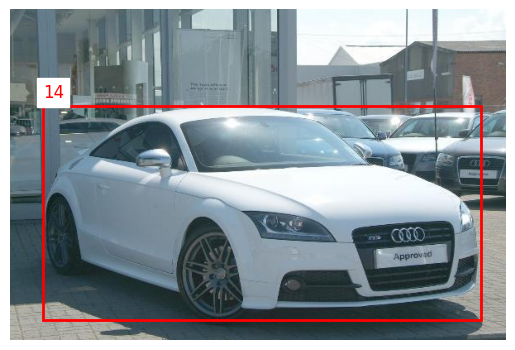

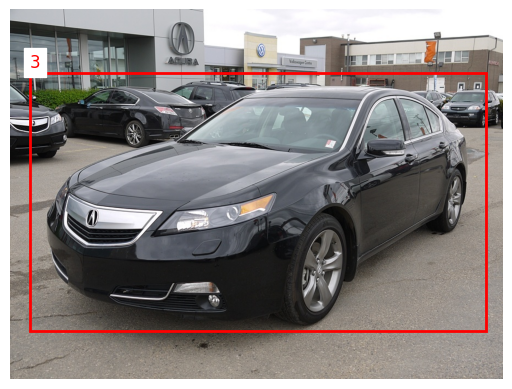

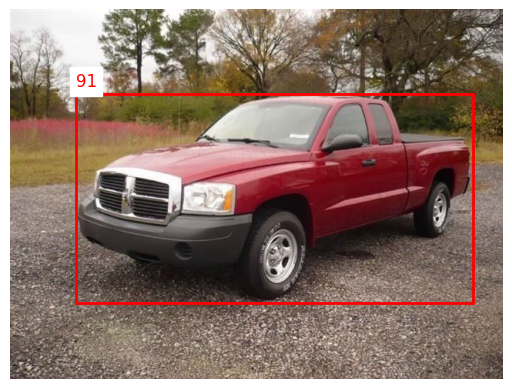

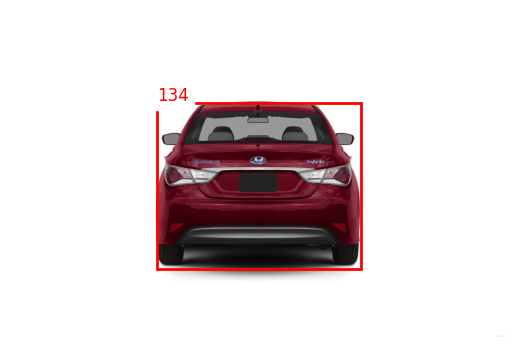

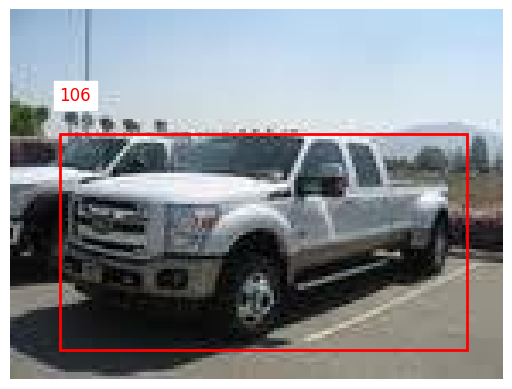

Displayed 5 training images with bounding boxes.


In [15]:
# for training images 
print("For Training Images") # Changed message to "Test Image"
displayed_image_count = 0  # Initialize a counter to track displayed images

image_paths_details_training=[]
images_paths_details_testing=[]

for index, row in train_annotations_df.iterrows():
    if displayed_image_count >= 5: # Check if we've already displayed two images
        break  # If yes, exit the loop

    image_name = str(row['Image Name']).strip()
    image_path = None # Initialize image_path to None


    for class_folder in train_class_folders:
        potential_image_path = os.path.join(class_folder, image_name)
        if os.path.exists(potential_image_path):
            image_path = potential_image_path
            image_paths_details_training.append(potential_image_path)
            break # Image found, no need to check other class folders

    if image_path: # If image_path is found (not None)
        annotation = {
            'bbox': [row['Bounding Box coordinates_xmin'], row['Bounding Box coordinates_ymin'], row['Bounding Box coordinates_xmax'], row['Bounding Box coordinates_ymax']],
            'image_class' : row['Image class']
        }
        display_image_with_bbox(image_path, annotation)
        displayed_image_count += 1 # Increment the counter
    #else:
    #    print(f"Training Image not found: {image_name}")

print(f"Displayed {displayed_image_count} training images with bounding boxes.")

For Testing Images


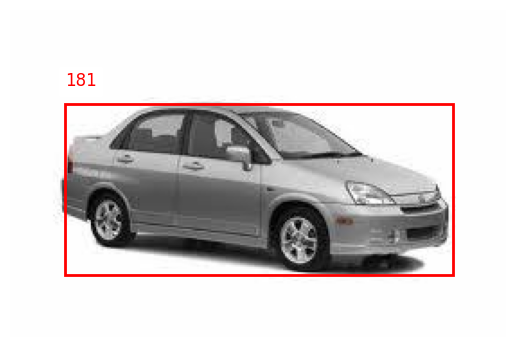

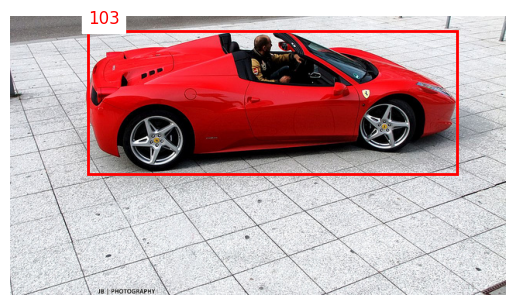

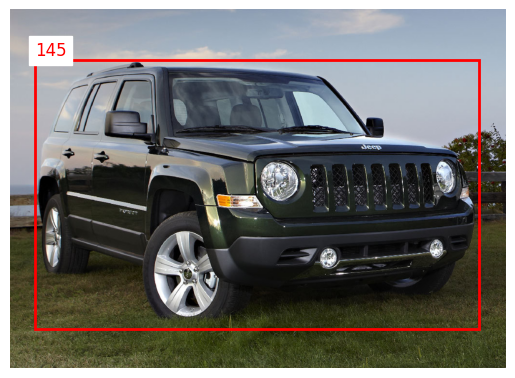

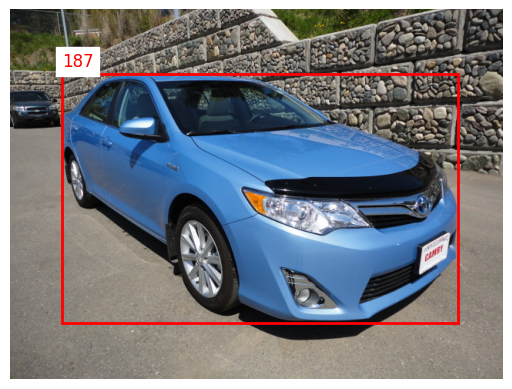

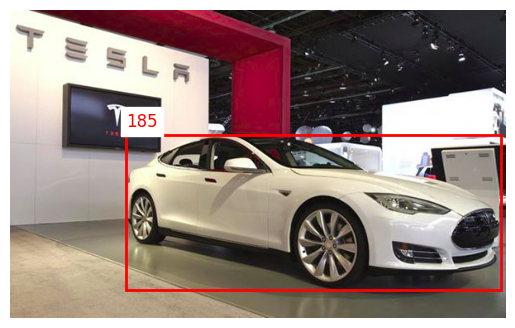

Displayed 5 test images with bounding boxes.


In [16]:

# for test images 
print("For Testing Images") # Changed message to "Test Image"
displayed_image_count_test = 0  # Initialize a counter to track displayed images

for index, row in test_annotations_df.iterrows():  # Use test_annotations_df DataFrame
    if displayed_image_count_test >= 5: # Check if we've already displayed two images (adjust number here if you want 5 or more)
        break  # If yes, exit the loop

    image_name_test = str(row['Image Name']).strip()
    image_path_test = None # Initialize image_path_test to None

    for class_folder in test_class_folders: # Use test_class_folders
        potential_image_path_test = os.path.join(class_folder, image_name_test)
        if os.path.exists(potential_image_path_test):
            image_path_test = potential_image_path_test # Assigned to image_path_test
            images_paths_details_testing.append(potential_image_path)
            break # Image found, no need to check other class folders

    if image_path_test: # If image_path_test is found (not None)
        annotation_test = {
            'bbox': [row['Bounding Box coordinates_xmin'], row['Bounding Box coordinates_ymin'], row['Bounding Box coordinates_xmax'], row['Bounding Box coordinates_ymax']],
            'image_class' : row['Image class'] # Assuming 'Image class' column also exists in test_annotations_df (verify!)
        }
        display_image_with_bbox(image_path_test, annotation_test)  # Changed here
        displayed_image_count_test += 1 # Increment the counter
    #else:
    #    print(f"Test Image not found: {image_name_test}") # Changed message to "Test Image"

print(f"Displayed {displayed_image_count_test} test images with bounding boxes.") # Changed message to "test images"


     

6. Design Basic CNN Models


The Models designed are:

1. VGGNet
2. GoogleNet
3. AlexNet
4. U-Net

In [17]:
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Load and preprocess an image for CNN input.
    """
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Warning: Image file not found: {image_path}")
        return None  # Or handle the missing image in a way that makes sense for your application

    image = cv2.imread(image_path)  # Load image

    # Check if image loading was successful
    if image is None:
        print(f"Warning: Failed to load image: {image_path}")
        return None  # Or handle the loading error as needed

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    image = cv2.resize(image, target_size)  # Resize to target size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image

In [18]:
def custom_generator(df, batch_size, target_size):
    """
    Custom generator for images and labels.
    """
    num_samples = len(df)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_samples = df.iloc[offset:offset + batch_size]
            images = []
            labels = []
            for _, row in batch_samples.iterrows():
                image = preprocess_image(row['Image_Path'], target_size)
                label = row['label_categorical']
                images.append(image)
                labels.append(label)
            X = np.array(images)
            y = np.array(labels)
            yield X, y

In [19]:
# Apply preprocessing to all images
df_testing['image'] = df_testing['Image_Path'].apply(preprocess_image)
df_training['image'] = df_training['Image_Path'].apply(preprocess_image)

# Check for and handle None values in the 'image' column
df_testing = df_testing.dropna(subset=['image'])  # Remove rows with None in 'image'
df_training = df_training.dropna(subset=['image'])  # Remove rows with None in 'image'

In [20]:
# Encode labels
label_encoder = LabelEncoder()
df_testing['labels_encoded'] = label_encoder.fit_transform(df_testing['labels'])
df_training['labels_encoded'] = label_encoder.fit_transform(df_training['labels'])

# Convert labels to categorical (one-hot encoding)
df_testing['label_categorical'] = df_testing['labels_encoded'].apply(lambda x: to_categorical(x, num_classes=len(test_class_folders)))
df_training['label_categorical'] = df_training['labels_encoded'].apply(lambda x: to_categorical(x, num_classes=len(test_class_folders)))

In [21]:
# Create generators
batch_size = 32
train_generator = custom_generator(df_training, batch_size, target_size=(224, 224))
val_generator = custom_generator(df_testing, batch_size, target_size=(224, 224))

In [22]:
# Check training generator
X_batch, y_batch = next(train_generator)
print("Training batch shape:", X_batch.shape, y_batch.shape)

# Check validation generator
X_batch, y_batch = next(val_generator)
print("Validation batch shape:", X_batch.shape, y_batch.shape)

Training batch shape: (32, 224, 224, 3) (32, 196)
Validation batch shape: (32, 224, 224, 3) (32, 196)


6A. VGGNet CNN Model

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [24]:
train_images = []
for img_path in df_training['Image_Path'].head(100):  # Iterate through image paths
    img = load_img(img_path, target_size=(224, 224))  # Load the image
    img_array = img_to_array(img)  # Convert to NumPy array
    train_images.append(img_array)  # Add to the list

train_images = np.array(train_images)  # Convert list to NumPy array

# --- Apply resizing if needed ---
train_images = np.array([cv2.resize(img, (224, 224)) for img in train_images])

#train_labels = np.stack(df_training['label_categorical'].head(20).values)
# Load training labels
label_encoder = LabelEncoder()

df_training['label_categorical'] = df_training['label_categorical'].astype(str)
df_testing['label_categorical'] = df_testing['label_categorical'].astype(str)

df_training['label_categorical'] = label_encoder.fit_transform(df_training['label_categorical'])
df_testing['label_categorical'] = label_encoder.transform(df_testing['label_categorical'])  # Ensure test uses same encoding

num_classes =len(label_encoder.classes_)  # Define number of classes
print('the number of classes are ',num_classes)
train_labels = to_categorical(df_training['label_categorical'].head(100).values, num_classes=num_classes)#one hot encoding, since softmax is used

# Similarly for test images:
test_images = []
for img_path in df_testing['Image_Path'].head(100):  # Iterate through image paths
    img = load_img(img_path, target_size=(224, 224))  # Load the image
    img_array = img_to_array(img)  # Convert to NumPy array
    test_images.append(img_array)  # Add to the list

test_images = np.array(test_images)  # Convert list to NumPy array

# --- Apply resizing if needed ---
test_images = np.array([cv2.resize(img, (224, 224)) for img in test_images])

#test_labels = np.stack(df_testing['label_categorical'].head(20).values)
test_labels = to_categorical(df_testing['label_categorical'].head(100).values, num_classes=num_classes) #one hot encoding, since softmax is used

# Check shapes
print(f"train_images shape: {train_images.shape}")
print(f"train_labels shape: {train_labels.shape}")
print(f"test_images shape: {test_images.shape}")
print(f"test_labels shape: {test_labels.shape}")

# Split training data into train & validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator(rescale=1./255)  

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)


# Load VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
#datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

model.summary()
# Fit the model
#model.fit(datagen.flow(train_images, train_labels, batch_size=32, subset='training'),
#          validation_data=datagen.flow(train_images, train_labels, batch_size=32, subset='validation'),
#          epochs=10)
history = model.fit(train_generator,
          validation_data=val_generator,
          epochs=10)
#validation and training accuracy
final_train_accuracy = history.history['accuracy'][-1]  # Last epoch's training accuracy
final_train_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]  # Last epoch's validation accuracy
final_val_loss = history.history['val_loss'][-1]
print(f"Final Training Accuracy {final_train_accuracy:.2f}" )
print(f"Final Training Value Loss {final_train_loss:.4f}" )
print(f"Final Validation Accuracy {final_val_accuracy:.2f}" )
print(f"Final Training Value Loss {final_val_loss:.4f}" )



the number of classes are  196
train_images shape: (100, 224, 224, 3)
train_labels shape: (100, 196)
test_images shape: (100, 224, 224, 3)
test_labels shape: (100, 196)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,187,844 (80.83 MB)

 Trainable params: 21,187,844 (80.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


D:\Program Files\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 16s/step - accuracy: 0.0250 - loss: 55.7308 - val_accuracy: 0.5500 - val_loss: 87.9268
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 17s/step - accuracy: 0.4227 - loss: 61.1846 - val_accuracy: 0.2500 - val_loss: 3.6376
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 53s 21s/step - accuracy: 0.2469 - loss: 3.9197 - val_accuracy: 0.2500 - val_loss: 18.2853
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 17s/step - accuracy: 0.3448 - loss: 10.8672 - val_accuracy: 0.5500 - val_loss: 1.4155
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 17s/step - accuracy: 0.4117 - loss: 1.5961 - val_accuracy: 0.5500 - val_loss: 1.0894
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 54s 17s/step - accuracy: 0.3974 - loss: 1.2012 - val_accuracy: 0.2000 - val_loss: 1.2522
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 19s/step - accuracy: 0.3773 - loss: 1.1243 - val_accuracy: 0.4500 - val_loss: 1.0798
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 63s 26s/step - accuracy: 0.6177 - loss: 1.0020 - val_accuracy: 0.5500 - val_loss: 1.0525
Epoch 

In [25]:
#testing model 
test_generator = test_datagen.flow(    
    test_images[:100],
    test_labels,
    batch_size=32,      
    shuffle=False  
)
test_loss, test_accuracy = model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.2448 - loss: 2.4655    


In [26]:
vggtable = PrettyTable()

# Define the columns
vggtable.field_names = ["model", "accuracy", "loss"]
vggtable.add_row(["training", final_train_accuracy,final_train_loss])
vggtable.add_row(["validation", final_val_accuracy,final_val_loss])
vggtable.add_row(["test", test_accuracy,test_loss])
print(vggtable)

+------------+--------------------+--------------------+
|   model    |      accuracy      |        loss        |
+------------+--------------------+--------------------+
|  training  | 0.637499988079071  | 0.832039475440979  |
| validation | 0.6499999761581421 | 1.0231339931488037 |
|    test    | 0.3333333432674408 | 2.353137254714966  |
+------------+--------------------+--------------------+


**Observation (Sample of 100 images):**

**The model has a huge loss value in both training,validation and testing given**

**In general the model is not performing well, this can be done by improving generalization by unfreezing layer, increasing sample size and data augmentation**


7. Summary